In [23]:
from agent import Agent
from monitor import interact
import gym
import numpy as np
import seaborn as sns
import pandas as pd

In [54]:
optimal_sarsa_max = {'algorithm': 'sarsamax','alpha': 0.2512238484351891, 'epsilon_cut': 0, 'epsilon_decay': 0.8888782926665223, 'start_epsilon': 0.9957089031634627, 'gamma': 0.7749915552696941}
optimal_exp_sarsa = {'algorithm': 'exp_sarsa', 'alpha': 0.2946281065178629, 'epsilon_cut': 0, 'epsilon_decay': 0.8978159313202051, 'start_epsilon': 0.9803552534195048, 'gamma': 0.6673937505783256}


In [55]:
env = gym.make('Taxi-v2')
agent = Agent(**optimal_sarsa_max)
avg_rewards_sarsamax, best_avg_reward_sarsamax = interact(env, agent)

agent = Agent(**optimal_exp_sarsa)
avg_rewards_exp_sarsa, best_avg_exp_sarsa = interact(env, agent)

Episode 20000/20000 || Best average reward 9.493

Episode 20000/20000 || Best average reward 9.245



In [56]:
data = pd.DataFrame(list(avg_rewards_sarsamax), columns=['reward'])
data.loc[:,'episode'] = range(0,len(list(avg_rewards_sarsamax)))
data.loc[:,'type'] = 'Sarsa Max'

data1 = pd.DataFrame(list(avg_rewards_exp_sarsa), columns=['reward'])
data1.loc[:,'episode'] = range(0,len(list(avg_rewards_sarsamax)))
data1.loc[:,'type'] = 'Expectation Sarsa'

data = data1.append(data)

In [72]:
data[data.type=='Sarsa Max'].max()

reward          9.49
episode        19900
type       Sarsa Max
dtype: object

In [74]:
data[data.type=='Expectation Sarsa'].max()

reward                  9.24
episode                19900
type       Expectation Sarsa
dtype: object

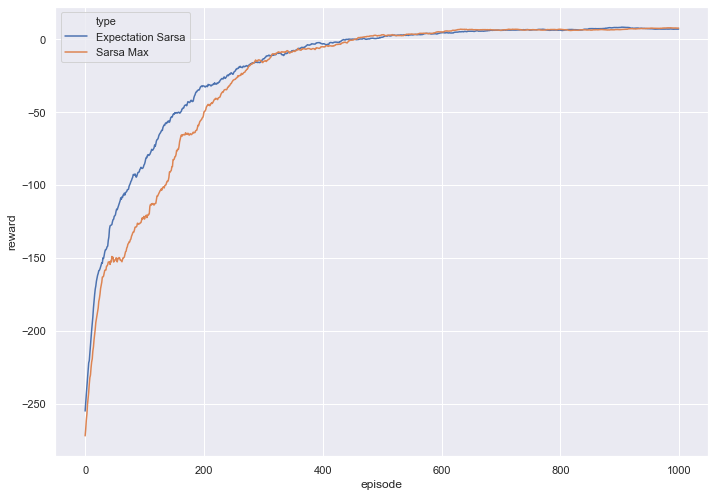

In [69]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns_plot = sns.lineplot(x='episode', y='reward', hue='type',data = data[data.episode<1000])
sns_plot.figure.savefig("tax1v2.png")

In [59]:
#Who wins more often? SarsaMax of Expectation Sarsa?
sarsa_max_wins = 0
for i in range(10):
    env = gym.make('Taxi-v2')
    agent = Agent(**optimal_sarsa_max)
    avg_rewards_sarsamax, best_avg_reward_sarsamax = interact(env, agent)

    agent = Agent(**optimal_exp_sarsa)
    avg_rewards_exp_sarsa, best_avg_exp_sarsa = interact(env, agent)
    
    if best_avg_reward_sarsamax>best_avg_exp_sarsa: sarsa_max_wins += 1

Episode 20000/20000 || Best average reward 9.246

Episode 20000/20000 || Best average reward 9.322

Episode 20000/20000 || Best average reward 9.258

Episode 20000/20000 || Best average reward 9.184

Episode 20000/20000 || Best average reward 9.232

Episode 20000/20000 || Best average reward 9.383

Episode 20000/20000 || Best average reward 9.288

Episode 20000/20000 || Best average reward 9.322

Episode 20000/20000 || Best average reward 9.344

Episode 20000/20000 || Best average reward 9.192

Episode 20000/20000 || Best average reward 9.288

Episode 20000/20000 || Best average reward 9.286

Episode 20000/20000 || Best average reward 9.338

Episode 20000/20000 || Best average reward 9.384

Episode 20000/20000 || Best average reward 9.181

Episode 20000/20000 || Best average reward 9.438

Episode 20000/20000 || Best average reward 9.239

Episode 20000/20000 || Best average reward 9.257

Episode 20000/20000 || Best average reward 9.373

Episode 20000/20000 || Best average reward 9.382



In [63]:
print(f'Sarsa max wins in {sarsa_max_wins/10*100}% of cases')

Sarsa max wins in 30.0% of cases


In [ ]:
# Sarsa Max got 9.493